In [1]:
# two

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 200,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 3
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\AI-lab\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.9629629629629629, Loss: 0.24569161732991537
Checkpoint 200, Accuracy: 0.9567901234567902, Loss: 0.2218211845115379
Checkpoint 300, Accuracy: 0.9629629629629629, Loss: 0.1931399769253201
Checkpoint 400, Accuracy: 0.9691358024691358, Loss: 0.17413609116165726
Checkpoint 500, Accuracy: 0.9691358024691358, Loss: 0.16096215777926975


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.9695663  0.02452473 0.00590903]
[0. 0. 1.] <-> [0.769113   0.0279068  0.20298012]
[0. 1. 0.] <-> [8.7397471e-02 9.1244948e-01 1.5299345e-04]
[1. 0. 0.] <-> [0.8928693  0.07145447 0.03567623]
[0. 1. 0.] <-> [4.3659121e-02 9.5628810e-01 5.2752443e-05]
[1. 0. 0.] <-> [0.613748  0.3851172 0.0011348]
[0. 1. 0.] <-> [4.2402841e-02 9.5748091e-01 1.1625273e-04]
[1. 0. 0.] <-> [0.9696581  0.02180716 0.0085347 ]
[1. 0. 0.] <-> [0.96668154 0.02100351 0.01231492]
[0. 1. 0.] <-> [3.1402573e-02 9.6844471e-01 1.5268353e-04]
[1. 0. 0.] <-> [0.7496654  0.1604128  0.08992176]
[1. 0. 0.] <-> [0.9690007  0.02064933 0.01034996]
[1. 0. 0.] <-> [0.9656672  0.02323288 0.01109984]
[0. 1. 0.] <-> [8.6932194e-01 1.2994827e-01 7.2975020e-04]
[1. 0. 0.] <-> [0.9573331  0.02002783 0.02263909]
[0. 0. 1.] <-> [0.12376775 0.02575125 0.85048103]
[1. 0. 0.] <-> [0.8624829  0.02734637 0.11017074]
[1. 0. 0.] <-> [0.6830509  0.03113    0.28581914]
[1. 0. 0.] <-> [0.93725514 0.02187964 0.04086522]
[1. 0. 0

In [12]:
# Testing Performance

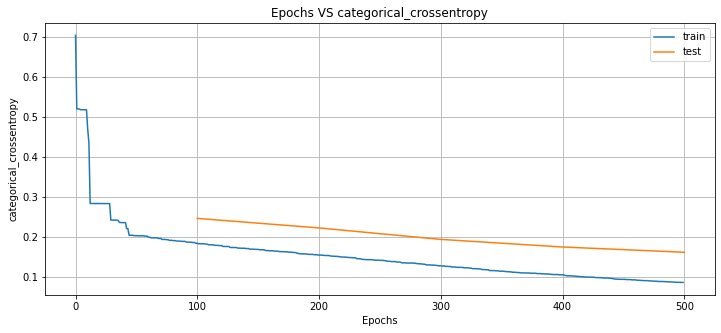

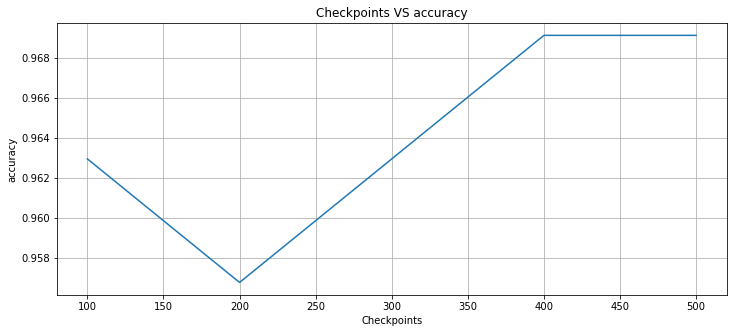

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9629629629629629, 'mean_square_error': 0.11742072481110662, 'categorical_crossentropy': 0.24569161732991537, 'precision': 0.9444444444444444, 'recall': 0.9444444444444444, 'f1': 0.9444444444444444, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 6, 'tn_hit': 24, 'fn_hit': 0}, 1: {'tp_hit': 12, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 4}, 2: {'tp_hit': 12, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 2}}, 'checkpoint': 100} 


{'accuracy': 0.9567901234567902, 'mean_square_error': 0.10821739827081045, 'categorical_crossentropy': 0.2218211845115379, 'precision': 0.9351851851851852, 'recall': 0.9351851851851852, 'f1': 0.9351851851851852, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 7, 'tn_hit': 23, 'fn_hit': 0}, 1: {'tp_hit': 12, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 4}, 2: {'tp_hit': 11, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 3}}, 'checkpoint': 200} 


{'accuracy': 0.9629629629629629, 'mean_square_error': 0.09292894978569027, 'categorical_crossentropy': 0.1931399769253201, 'precisi

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[-0.1948094   2.3522463  -0.02717697 -1.2775908  -0.6739422 ]
 bias: -1.6801869869232178

Neuron 1: weights:
[ 1.1457924 -1.5102941 -1.5272845  1.2885019  1.4624696]
 bias: -2.9368932247161865

Neuron 2: weights:
[-1.181655  -3.         2.2222764  1.6169457  2.0618112]
 bias: -1.892302393913269

Neuron 3: weights:
[-2.287726   3.         1.7930179 -0.6540169  1.3021976]
 bias: -2.2214438915252686

$
Layer 2
Neuron 0: weights:
[ 0.6148865 -2.8181293 -1.922981  -2.5929763]
 bias: 2.02968430519104

Neuron 1: weights:
[ 2.6538723  -0.41543362 -0.6879998   2.9411473 ]
 bias: -2.456434488296509

Neuron 2: weights:
[-2.6191704  1.6140184  2.628493  -1.6291838]
 bias: -2.4263341426849365

$

